In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
%matplotlib inline

## Step 0 - Data Import

In [29]:
data = pd.read_csv('747.csv')
data.columns
data.head()
data

,time (min),raw light scattering data: detector voltage (V) detector 2,raw light scattering data: detector voltage (V) detector 3,raw light scattering data: detector voltage (V) detector 4,raw light scattering data: detector voltage (V) detector 5,raw light scattering data: detector voltage (V) detector 6,raw light scattering data: detector voltage (V) detector 7,raw light scattering data: detector voltage (V) detector 8,raw light scattering data: detector voltage (V) detector 9,raw light scattering data: detector voltage (V) detector 10,...,raw light scattering data: detector voltage (V) detector 15,raw light scattering data: detector voltage (V) detector 16,raw light scattering data: detector voltage (V) detector 17,raw light scattering data: detector voltage (V) detector 18,UV absorbance data: absorbance (AU) channel 1,UV absorbance data: absorbance (AU) channel 2,count rate: count rate (Hz),count rate at corr. func.: count rate (Hz),Forward Laser Monitor: Forward Laser Monitor (V),Auto-inject Signal: Auto-inject Signal
0,0.004267,0.116025,0.028934,0.014760,0.006790,0.015795,0.011698,0.010381,0.008974,0.008909,...,0.013398,0.017540,0.015734,0.020336,NaN,NaN,49247.46809,,0.930894,
1,0.012800,0.116024,0.028932,0.014762,0.006788,0.015794,0.011701,0.010378,0.008975,0.008908,...,0.013398,0.017538,0.015736,0.020340,-0.000015,0.000013,49307.54003,,0.930904,
2,0.021333,0.116034,0.028927,0.014768,0.006788,0.015791,0.011704,0.010375,0.008974,0.008910,...,0.013398,0.017537,0.015730,0.020344,-0.000016,0.000010,48985.66150,48992.5118100000,0.930920,
3,0.029867,0.116034,0.028930,0.014770,0.006790,0.015799,0.011708,0.010382,0.008979,0.008915,...,0.013408,0.017544,0.015728,0.020348,-0.000016,0.000009,47835.78403,48976.7657300000,0.930926,
4,0.038400,0.116044,0.028938,0.014768,0.006795,0.015808,0.011705,0.010379,0.008976,0.008916,...,0.013404,0.017544,0.015722,0.020353,-0.000016,0.000009,48948.79950,48961.0196400000,0.930933,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,63.961800,0.115288,0.029277,0.014849,0.006860,0.015882,0.011823,0.010450,0.009074,0.008975,...,0.013453,0.017569,0.015811,0.020297,0.001007,0.000858,50396.71914,50284.4348400000,0.932803,
7496,63.970333,0.115322,0.029237,0.014839,0.006844,0.015834,0.011779,0.010427,0.009049,0.008954,...,0.013431,0.017557,0.015798,0.020286,0.001004,0.000860,50186.41688,50405.2210600000,0.932772,
7497,63.978867,0.115532,0.029367,0.014959,0.006868,0.015882,0.011819,0.010454,0.009059,0.008972,...,0.013455,0.017573,0.015807,0.020294,0.001000,0.000859,49259.13630,50526.0072900000,0.932766,
7498,63.987400,0.116235,0.029439,0.014975,0.006900,0.016006,0.011949,0.010510,0.009156,0.009017,...,0.013530,0.017603,0.015838,0.020311,0.000998,0.000858,53194.74575,,0.932766,


In [30]:
#data['UV absorbance data: absorbance  (AU) channel 1'] = data['UV absorbance data: absorbance  (AU) channel 1'].interpolate()
time = data['time (min)']
signal_intensity = data['raw light scattering data: detector voltage  (V) detector 11']
absorbance_UV1 = data['UV absorbance data: absorbance  (AU) channel 1']
absorbance_UV2 = data['UV absorbance data: absorbance  (AU) channel 2']

## Step 1 - Basic Collection

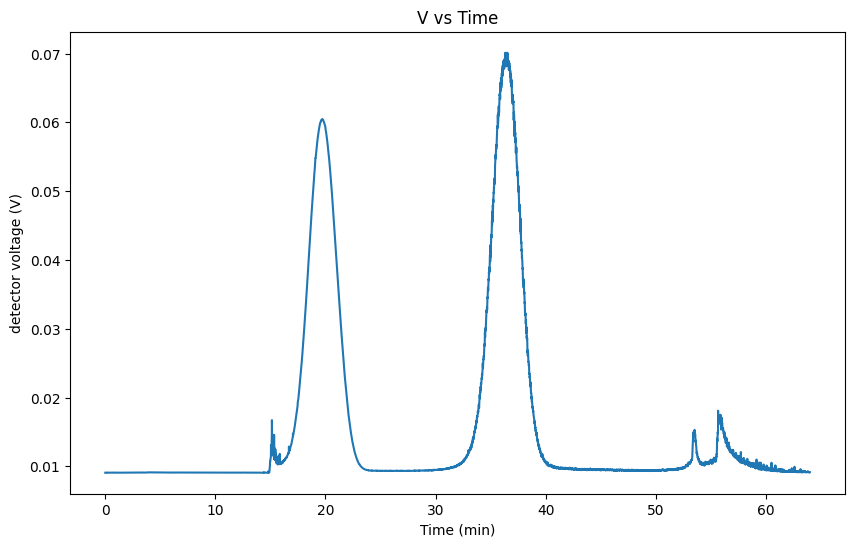

In [37]:
plt.figure(figsize=(10,6))
plt.plot(time,signal_intensity)
plt.xlabel('Time (min)')
plt.ylabel('detector voltage (V)')
plt.title('V vs Time')
plt.show()

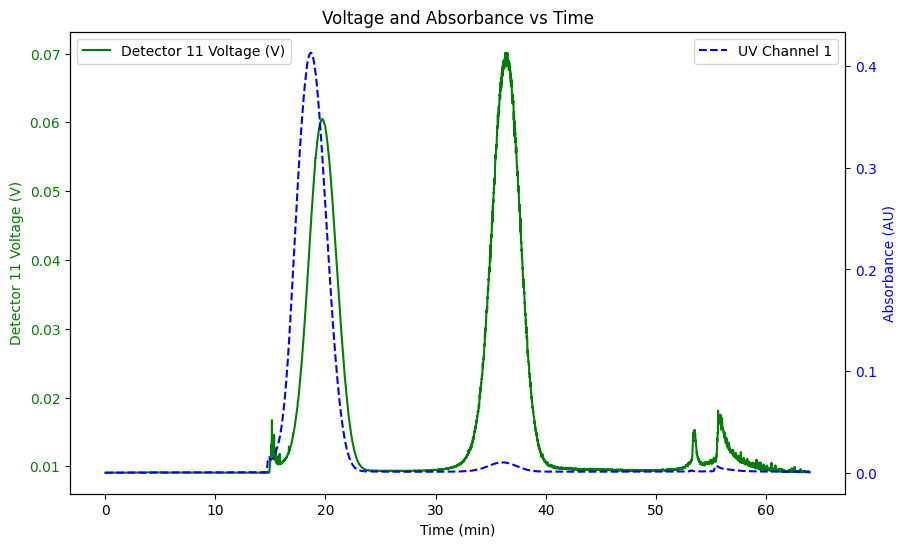

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(time, signal_intensity, 'g-', label='Detector 11 Voltage (V)')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Detector 11 Voltage (V)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(time, absorbance_UV1, 'b--', label='UV Channel 1')
ax2.set_ylabel('Absorbance (AU)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Voltage and Absorbance vs Time')
plt.show()

## Step 2 - Despiking (Median Filter)

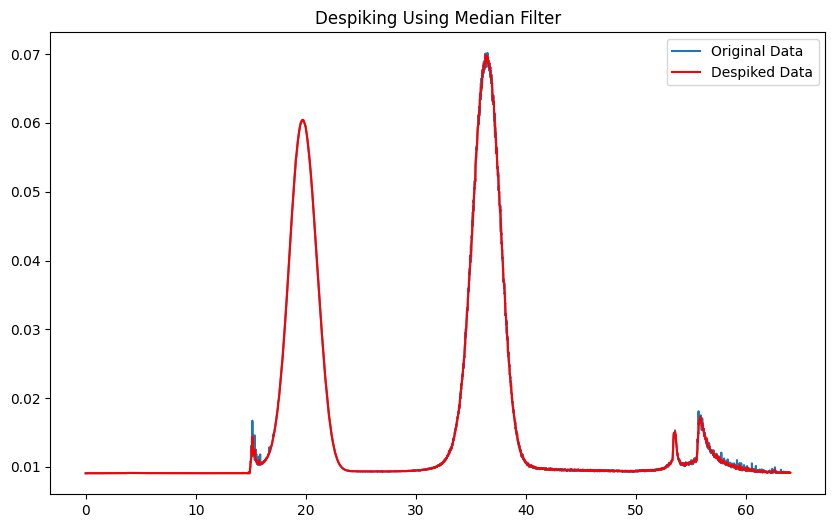

In [38]:
kernel_size = 5  # Choose an appropriate kernel size
median_signalIntensity = medfilt(signal_intensity,kernel_size)

# Plot the original and despiked data
fig3 = plt.figure(figsize=(10, 6))
plt.plot(time,signal_intensity, label='Original Data')
plt.plot(time,median_signalIntensity, label='Despiked Data', color='red')
plt.title('Despiking Using Median Filter')
plt.legend()
plt.show()

## Step 3 - Baselines

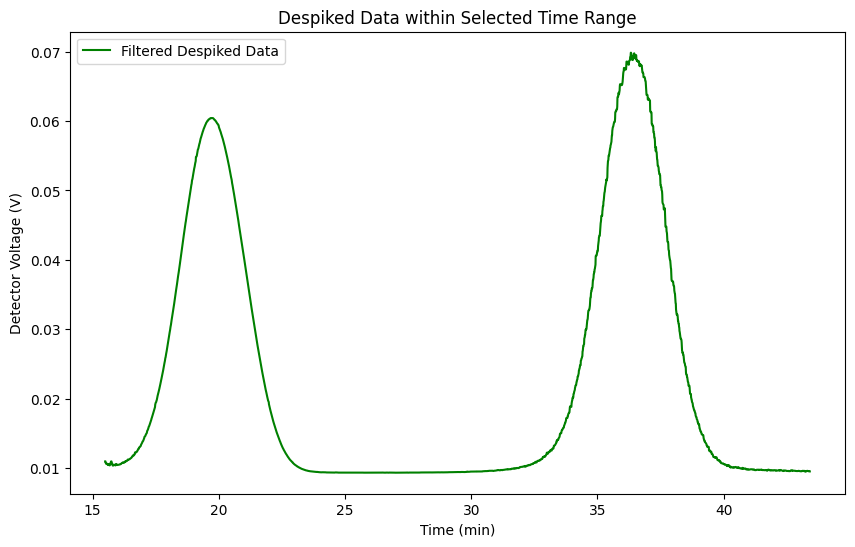

In [51]:
#Definitions
start_time = 15.5
end_time = 43.42

# Filter the data to include only defined times
filtered_indices = (time >= start_time) & (time <= end_time)
filtered_time = time[filtered_indices]
filtered_signal = median_signalIntensity[filtered_indices]

# plot
plt.figure(figsize=(10,6))
plt.plot(filtered_time,filtered_signal, label='Filtered Despiked Data',color='green')
plt.xlabel('Time (min)')
plt.ylabel('Detector Voltage (V)')
plt.title('Despiked Data within Selected Time Range')
plt.legend()
plt.show()

## Step 4 - Peaks

In [ ]:
def normalise_signal(signal):
    return signal / np.max(signal)

normalised_signal = normalise_signal(median_signalIntensity)
normalised_filtered_signal = normalise_signal(filtered_signal)

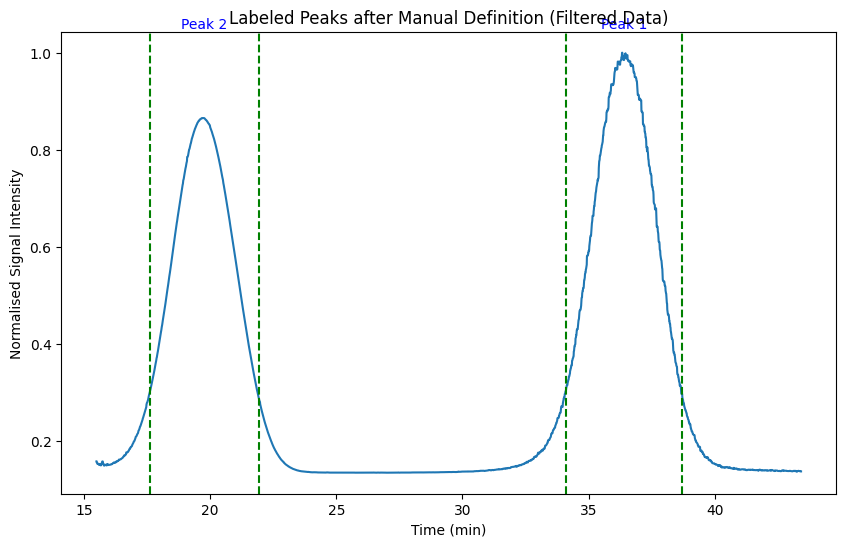

In [62]:
# Function to manually define peaks in the code (Filtered Data)
def manual_peak_definition_filtered(time, signal, peak_ranges):
    # Plotting with labeled peaks on the filtered data
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(time, signal)

    for i, (start, end) in enumerate(peak_ranges, 1):
        ax.axvline(x=start, color='green', linestyle='--')
        ax.axvline(x=end, color='green', linestyle='--')
        ax.text((start + end) / 2, 1.05, f'Peak {i}', color='blue', ha='center')

    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Normalised Signal Intensity')
    ax.set_title('Labeled Peaks after Manual Definition (Filtered Data)')
    plt.show()

    # Extract the data corresponding to each peak range
    peak_data = []
    for start, end in peak_ranges:
        peak_indices = (time >= start) & (time <= end)
        peak_time = time[peak_indices]
        peak_signal = signal[peak_indices]
        peak_data.append((peak_time, peak_signal))
    
    return peak_data

# Example usage
peak_ranges_manual_code = [(34.0950,38.7031), (17.6086, 21.9350)]
peak_data = manual_peak_definition_filtered(filtered_time, normalised_filtered_signal, peak_ranges_manual_code)

# Storing the datasets for future use
peak1_time, peak1_signal = peak_data[0]
peak2_time, peak2_signal = peak_data[1]